In [1]:
# Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Show all columns
pd.set_option('display.max_columns', None)


In [6]:
from google.colab import files
uploaded = files.upload()


Saving Amazon Sale Report.csv to Amazon Sale Report.csv


In [7]:
import pandas as pd

df = pd.read_csv("Amazon Sale Report.csv")
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [8]:
# Step 3: Understand the structure
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

np.int64(168)

In [9]:
# Drop unnecessary or empty columns
df = df.drop(columns=['index', 'New', 'PendingS'])

# Check shape after cleaning
df.shape


(128976, 18)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].head()


/tmp/ipython-input-664701225.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Date
0,2022-04-30
1,2022-04-30
2,2022-04-30
3,2022-04-30
4,2022-04-30


In [11]:
df.isnull().sum()


,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0
Qty,0


In [12]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128976 non-null  object        
 1   Date                128976 non-null  datetime64[ns]
 2   Status              128976 non-null  object        
 3   Fulfilment          128976 non-null  object        
 4   Sales Channel       128976 non-null  object        
 5   ship-service-level  128976 non-null  object        
 6   Category            128976 non-null  object        
 7   Size                128976 non-null  object        
 8   Courier Status      128976 non-null  object        
 9   Qty                 128976 non-null  int64         
 10  currency            121176 non-null  object        
 11  Amount              121176 non-null  float64       
 12  ship-city           128941 non-null  object        
 13  ship-state          128941 no

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [13]:
df.isnull().sum()


,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0
Qty,0


In [14]:
df = df.dropna(subset=['Amount'])


In [15]:
df = df.dropna(subset=['ship-city', 'ship-state', 'ship-country'])


In [16]:
df = df.dropna(subset=['Amount', 'ship-city', 'ship-state', 'ship-country'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            121143 non-null  object        
 1   Date                121143 non-null  datetime64[ns]
 2   Status              121143 non-null  object        
 3   Fulfilment          121143 non-null  object        
 4   Sales Channel       121143 non-null  object        
 5   ship-service-level  121143 non-null  object        
 6   Category            121143 non-null  object        
 7   Size                121143 non-null  object        
 8   Courier Status      121143 non-null  object        
 9   Qty                 121143 non-null  int64         
 10  currency            121143 non-null  object        
 11  Amount              121143 non-null  float64       
 12  ship-city           121143 non-null  object        
 13  ship-state          121143 non-nul

In [17]:
df.duplicated().sum()


np.int64(719)

In [18]:
df = df.drop_duplicates()



In [19]:
df.duplicated().sum()


np.int64(0)

In [20]:
df.dtypes


,0
Order ID,object
Date,datetime64[ns]
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Category,object
Size,object
Courier Status,object
Qty,int64


In [21]:
# 🔍 Full Data Cleanliness Check
print("✅ DATA CLEANLINESS REPORT ✅\n")

# 1️⃣ Missing Values
missing = df.isnull().sum()
print("🔸 Missing Values per Column:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")
print("\n----------------------------------")

# 2️⃣ Duplicate Rows
dupes = df.duplicated().sum()
print(f"🔸 Duplicate Rows: {dupes}")
print("----------------------------------")

# 3️⃣ Data Types
print("🔸 Data Types:")
print(df.dtypes)
print("----------------------------------")

# 4️⃣ Basic Stats for Numeric Columns
print("🔸 Numeric Summary:")
print(df.describe())
print("----------------------------------")

# 5️⃣ Final Verdict
if missing.sum() == 0 and dupes == 0:
    print("🎯 The dataset is CLEAN and ready for analysis!")
else:
    print("⚠️ The dataset still has some issues. Please review the above report.")


✅ DATA CLEANLINESS REPORT ✅

🔸 Missing Values per Column:
fulfilled-by    83200
dtype: int64

----------------------------------
🔸 Duplicate Rows: 0
----------------------------------
🔸 Data Types:
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object
----------------------------------
🔸 Numeric Summary:
                                Date            Qty         Amount  

In [22]:
# Step 2: Clean the Amazon Sales dataset

import numpy as np
import pandas as pd

# 1. Remove duplicate rows
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# 2. Drop fully empty columns
empty_cols = [col for col in df.columns if df[col].isnull().all()]
if empty_cols:
    df.drop(columns=empty_cols, inplace=True)
    print("Dropped fully empty columns:", empty_cols)

# 3. Clean text columns (strip spaces, replace invalids)
def clean_strings(col):
    return col.replace(r'^\s*$', np.nan, regex=True).replace(
        ['NaN', 'nan', 'N/A', 'null', 'NULL', '-', '—'], np.nan
    )

for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()
    df[c] = clean_strings(df[c])

# 4. Convert Date column to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 5. Convert Amount to numeric
if 'Amount' in df.columns:
    df['Amount'] = df['Amount'].astype(str).str.replace(r'[^\d\.\-]', '', regex=True)
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# 6. Recheck missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# 7. Show sample cleaned rows
print("\nCleaned dataset sample:")
print(df.head(5))


Before removing duplicates: (120424, 18)
After removing duplicates: (120424, 18)

Missing values after cleaning:
fulfilled-by          83200
Order ID                  0
Date                      0
Status                    0
Sales Channel             0
Fulfilment                0
Category                  0
Size                      0
Courier Status            0
ship-service-level        0
dtype: int64

Cleaned dataset sample:
              Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel ship-service-level  Category Size Courier Status  Qty  \
0     Amazon.in           S

In [23]:
df['fulfilled-by'] = df.apply(
    lambda x: 'Easy Ship' if pd.isna(x['fulfilled-by']) and x['Fulfilment']=='Merchant'
    else ('Amazon' if pd.isna(x['fulfilled-by']) and x['Fulfilment']=='Amazon'
          else x['fulfilled-by']),
    axis=1
)


In [24]:
# Step 3: Feature Engineering

# 1. Extract Year, Month, Day from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 2. Create Order_Month column (YYYY-MM format)
df['Order_Month'] = df['Date'].dt.to_period('M').astype(str)

# 3. Create is_cancelled flag (1 if Cancelled)
df['is_cancelled'] = df['Status'].apply(lambda x: 1 if 'cancel' in x.lower() else 0)

# 4. Calculate Revenue = Amount × Qty
df['Revenue'] = df['Amount'] * df['Qty']

# 5. Quick summary to verify new columns
print("✅ Feature Engineering Done")
print(df[['Date', 'Order_Month', 'Status', 'is_cancelled', 'Amount', 'Qty', 'Revenue']].head(10))
print("\nColumns added:", ['Year', 'Month', 'Day', 'Order_Month', 'is_cancelled', 'Revenue'])


✅ Feature Engineering Done
         Date Order_Month                        Status  is_cancelled  Amount  \
0  2022-04-30     2022-04                     Cancelled             1  647.62   
1  2022-04-30     2022-04  Shipped - Delivered to Buyer             0  406.00   
2  2022-04-30     2022-04                       Shipped             0  329.00   
3  2022-04-30     2022-04                     Cancelled             1  753.33   
4  2022-04-30     2022-04                       Shipped             0  574.00   
5  2022-04-30     2022-04                       Shipped             0  824.00   
6  2022-04-30     2022-04                       Shipped             0  653.00   
7  2022-04-30     2022-04  Shipped - Delivered to Buyer             0  399.00   
9  2022-04-30     2022-04                       Shipped             0  363.00   
10 2022-04-30     2022-04                       Shipped             0  685.00   

    Qty  Revenue  
0     0      0.0  
1     1    406.0  
2     1    329.0  
3    

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


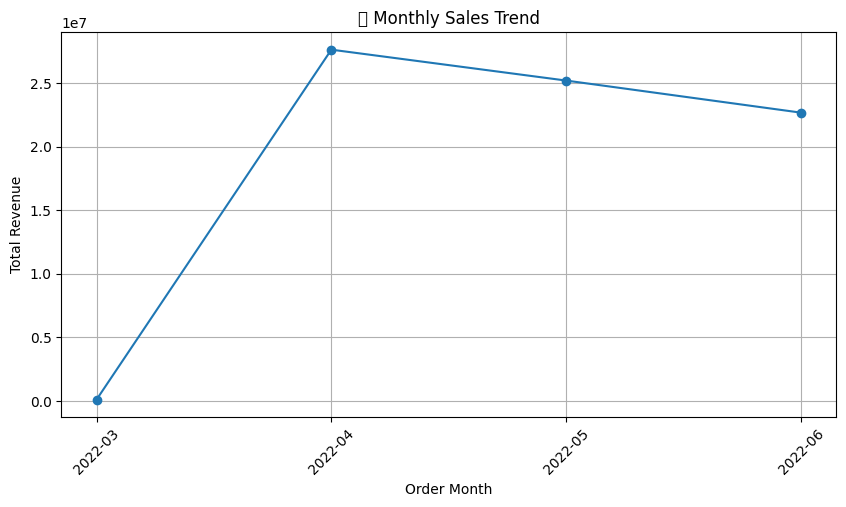

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


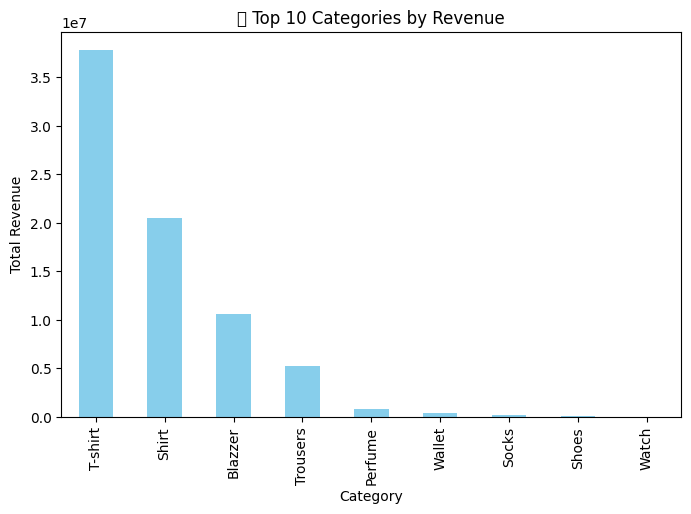

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


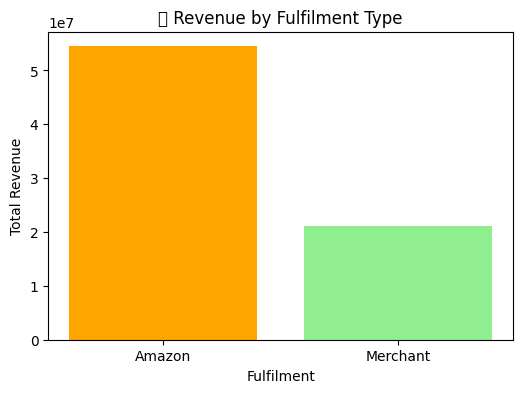

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127750 (\N{CITYSCAPE AT DUSK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


❌ Cancellation Rate: 8.88%


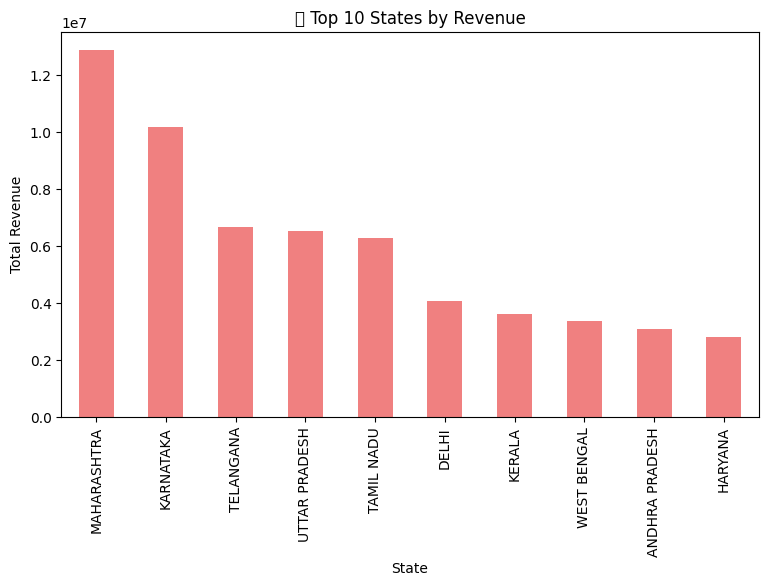

In [25]:
import matplotlib.pyplot as plt

# 1. Monthly Sales Trend
monthly_sales = df.groupby('Order_Month')['Revenue'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order_Month'], monthly_sales['Revenue'], marker='o')
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Order Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. Top 10 Categories by Revenue
top_categories = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_categories.plot(kind='bar', color='skyblue')
plt.title("🏷️ Top 10 Categories by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Category")
plt.show()

# 3. Fulfilment Type Comparison
fulfilment_revenue = df.groupby('Fulfilment')['Revenue'].sum().reset_index()
plt.figure(figsize=(6,4))
plt.bar(fulfilment_revenue['Fulfilment'], fulfilment_revenue['Revenue'], color=['orange','lightgreen'])
plt.title("📦 Revenue by Fulfilment Type")
plt.xlabel("Fulfilment")
plt.ylabel("Total Revenue")
plt.show()

# 4. Cancellation Rate
cancel_rate = df['is_cancelled'].mean() * 100
print(f"❌ Cancellation Rate: {cancel_rate:.2f}%")

# 5. Top 10 States by Revenue
top_states = df.groupby('ship-state')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5))
top_states.plot(kind='bar', color='lightcoral')
plt.title("🌆 Top 10 States by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("State")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


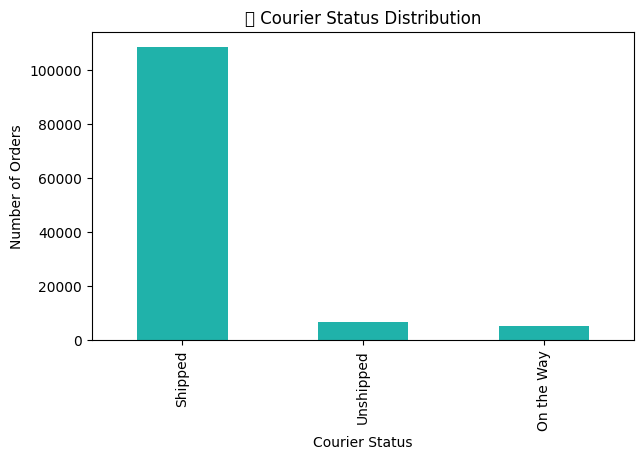

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


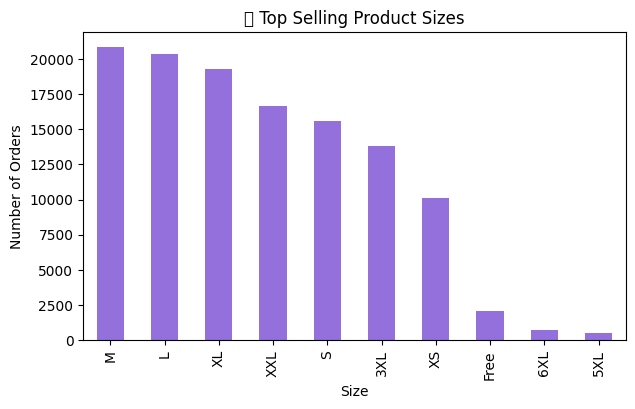

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


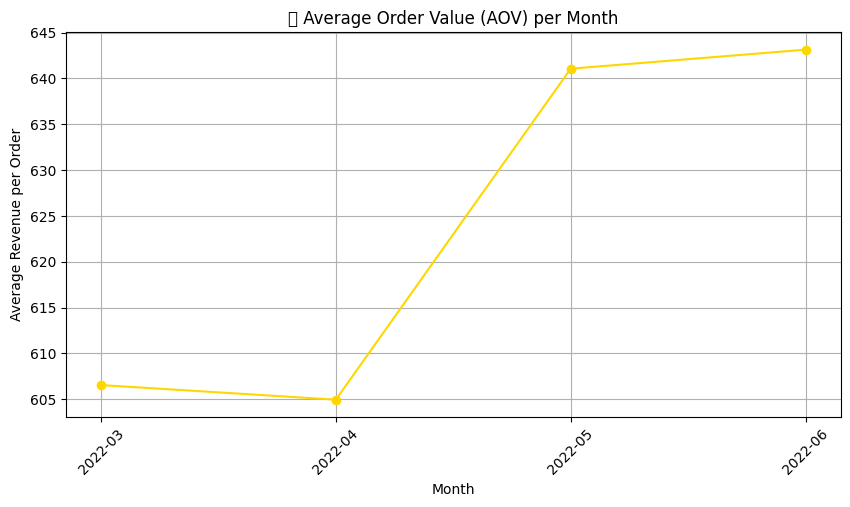

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


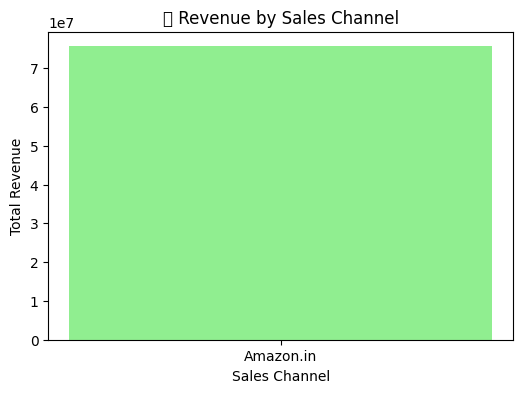

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


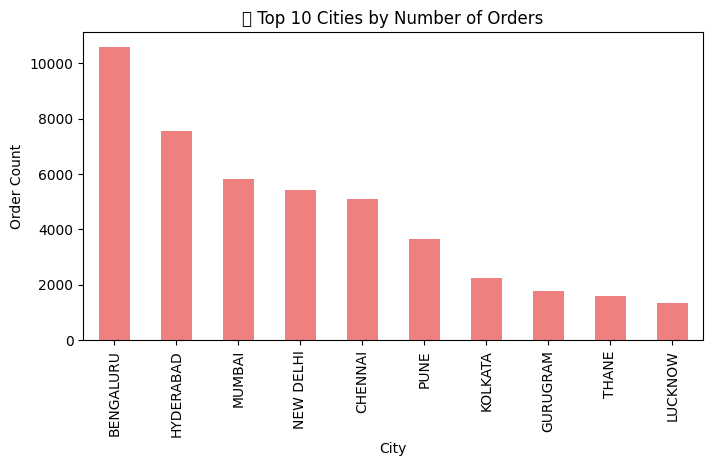

In [26]:
import matplotlib.pyplot as plt

# 1. Courier Status Analysis
courier_counts = df['Courier Status'].value_counts()
plt.figure(figsize=(7,4))
courier_counts.plot(kind='bar', color='lightseagreen')
plt.title("🚚 Courier Status Distribution")
plt.ylabel("Number of Orders")
plt.xlabel("Courier Status")
plt.show()

# 2. Product Size Demand
size_demand = df['Size'].value_counts().head(10)
plt.figure(figsize=(7,4))
size_demand.plot(kind='bar', color='mediumpurple')
plt.title("👕 Top Selling Product Sizes")
plt.ylabel("Number of Orders")
plt.xlabel("Size")
plt.show()

# 3. Average Order Value (AOV) per Month
aov = df.groupby('Order_Month')['Revenue'].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(aov['Order_Month'], aov['Revenue'], marker='o', color='gold')
plt.title("💰 Average Order Value (AOV) per Month")
plt.xlabel("Month")
plt.ylabel("Average Revenue per Order")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Sales Channel Performance
channel_perf = df.groupby('Sales Channel')['Revenue'].sum().reset_index()
plt.figure(figsize=(6,4))
plt.bar(channel_perf['Sales Channel'], channel_perf['Revenue'], color='lightgreen')
plt.title("🛒 Revenue by Sales Channel")
plt.ylabel("Total Revenue")
plt.xlabel("Sales Channel")
plt.show()

# 5. Top 10 Cities by Orders
top_cities = df['ship-city'].value_counts().head(10)
plt.figure(figsize=(8,4))
top_cities.plot(kind='bar', color='lightcoral')
plt.title("🏙️ Top 10 Cities by Number of Orders")
plt.ylabel("Order Count")
plt.xlabel("City")
plt.show()


In [27]:
# Save cleaned dataframe to CSV (run in your notebook where df exists)
OUTPUT_CLEAN = "/mnt/data/Amazon_Sale_Cleaned.csv"
df.to_csv(OUTPUT_CLEAN, index=False)
print("Saved cleaned CSV to:", OUTPUT_CLEAN)


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [28]:
# ✅ Save cleaned dataset to your local system
OUTPUT_CLEAN = "Amazon_Sale_Cleaned.csv"   # saved in the same folder as your notebook
df.to_csv(OUTPUT_CLEAN, index=False)
print("✅ Cleaned file saved as:", OUTPUT_CLEAN)


✅ Cleaned file saved as: Amazon_Sale_Cleaned.csv


In [29]:
from google.colab import files
files.download("Amazon_Sale_Cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>